<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. **Data Generation:** We generate synthetic data with a linear relationship (with added noise).
2. **Model Definition:** We define a simple linear regression model using a dense layer with 1 unit (single output).
3. **Training Loop:** We apply gradient descent to minimize the mean squared error.
4. **Plotting:** The model's prediction line is compared with the original data.
















Epoch 0, Loss: 0.5511
Epoch 20, Loss: 0.0071
Epoch 40, Loss: 0.0066
Epoch 60, Loss: 0.0067
Epoch 80, Loss: 0.0067
Epoch 100, Loss: 0.0067
Epoch 120, Loss: 0.0067
Epoch 140, Loss: 0.0067
Epoch 160, Loss: 0.0067
Epoch 180, Loss: 0.0067
Trained slope (w): 2.9591
Trained intercept (b): 1.0268
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


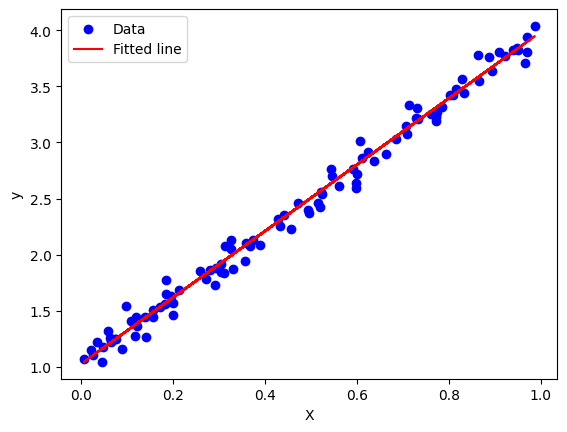

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100).astype(np.float32)
true_slope = 3.0
true_intercept = 1.0
noise = np.random.normal(0, 0.1, X.shape)
y = true_slope * X + true_intercept + noise

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(10)

# Define the model
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        inputs = tf.expand_dims(inputs, axis=-1)  # Reshape inputs to be 2D
        return self.dense(inputs)

model = LinearRegressionModel()

# Define loss and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Training the model
num_epochs = 200
for epoch in range(num_epochs):
    for X_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            loss = loss_fn(y_batch, y_pred)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the loss every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# Extract trained parameters
w, b = model.dense.weights
print(f"Trained slope (w): {w.numpy()[0][0]:.4f}")
print(f"Trained intercept (b): {b.numpy()[0]:.4f}")

# Plot the results
plt.scatter(X, y, label="Data", color="blue")
plt.plot(X, model.predict(X), label="Fitted line", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
